In [ ]:
!pip install pmdarima
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

     |████████████████████████████████| 1.4 MB 11.4 MB/s 
     |████████████████████████████████| 9.8 MB 63.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# ARIMA

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/satriarifandy/dataset/master/Gold%20Futures%20Historical%20Data%20edit.csv')
df = df.filter(['Date', 'Price'])
df

,Date,Price
0,01-Jan-21,1901.6
1,31-Dec-20,1914.0
2,30-Dec-20,1911.8
3,29-Dec-20,1900.8
4,28-Dec-20,1898.0
...,...,...
2605,07-Jan-11,1368.5
2606,06-Jan-11,1371.4
2607,05-Jan-11,1373.4
2608,04-Jan-11,1378.5


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Price
Date,
2021-01-01,1901.6
2020-12-31,1914.0
2020-12-30,1911.8
2020-12-29,1900.8
2020-12-28,1898.0
...,...
2011-01-07,1368.5
2011-01-06,1371.4
2011-01-05,1373.4


In [ ]:
df.duplicated().sum()

517

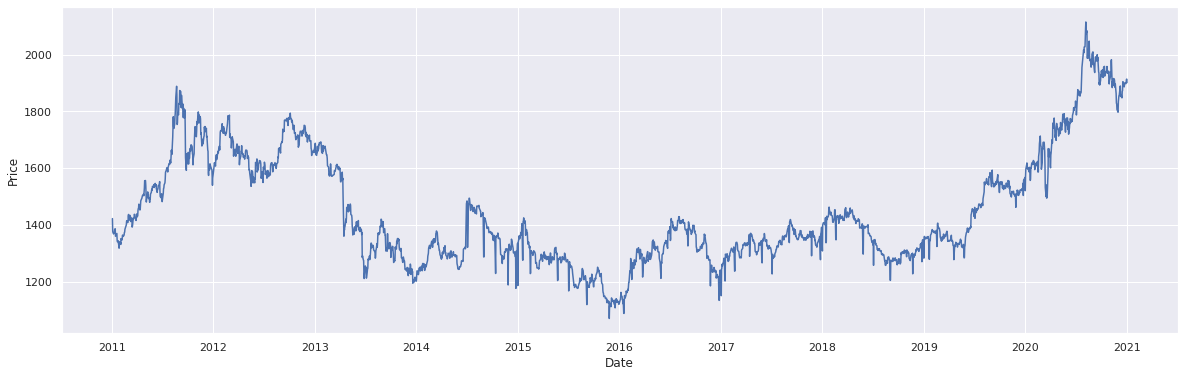

In [ ]:
sns.set(rc={'figure.figsize':(20,6)})
sns.lineplot(data=df, x="Date", y="Price")

In [ ]:
df1 = df.Price.resample('D').mean()
df1 = df1.to_frame()
df1

,Price
Date,
2011-01-03,1422.6
2011-01-04,1378.5
2011-01-05,1373.4
2011-01-06,1371.4
2011-01-07,1368.5
...,...
2020-12-28,1898.0
2020-12-29,1900.8
2020-12-30,1911.8


In [ ]:
def fill_missing():
  for x in range(df1.shape[0]):
    if np.isnan(df1['Price'][x]) == True:
      df1['Price'][x] = (df1['Price'][x-7] + df1['Price'][x-6] + df1['Price'][x-5]
                         +df1['Price'][x-4]+df1['Price'][x-3]+df1['Price'][x-2]+df1['Price'][x-1])/7

fill_missing()

In [ ]:
train_data, test_data = df1[0:int(len(df1)*0.8)], df1[int(len(df1)*0.8):]
print(len(train_data), ',',len(test_data))

2921 , 731


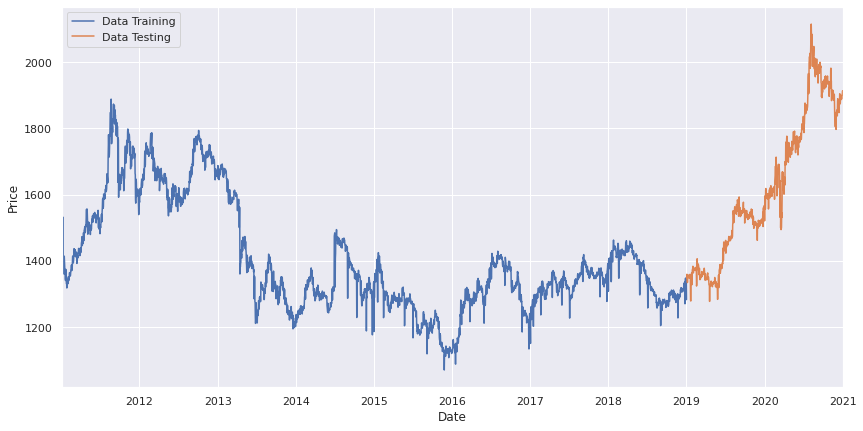

In [ ]:
ax = train_data.Price.plot(label='Data Training', figsize=(14, 7))
test_data.Price.plot(ax=ax, label='Data Testing')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [ ]:
test_data

,Price
Date,
2019-01-02,1349.500000
2019-01-03,1359.800000
2019-01-04,1351.000000
2019-01-05,1334.768286
2019-01-06,1336.041096
...,...
2020-12-28,1898.000000
2020-12-29,1900.800000
2020-12-30,1911.800000


In [ ]:
train_data

,Price
Date,
2011-01-03,1422.600000
2011-01-04,1378.500000
2011-01-05,1373.400000
2011-01-06,1371.400000
2011-01-07,1368.500000
...,...
2018-12-28,1348.300000
2018-12-29,1325.858616
2018-12-30,1326.769387


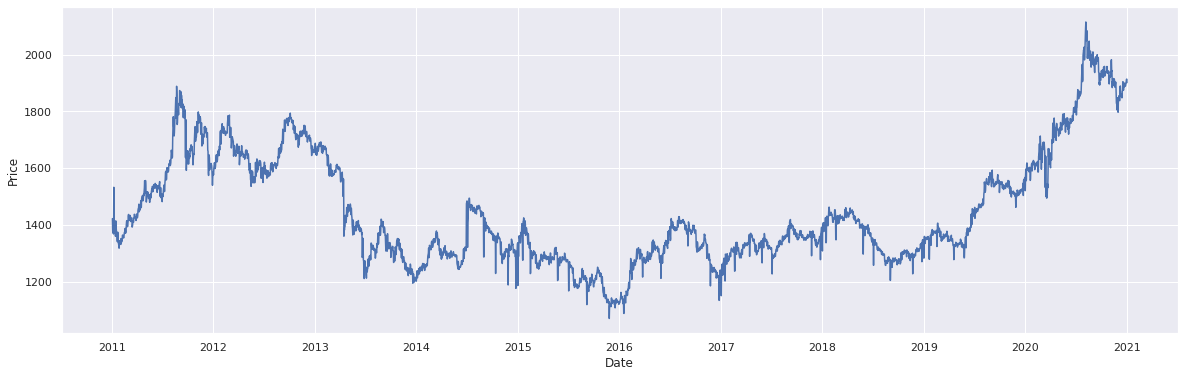

In [ ]:
sns.set(rc={'figure.figsize':(20,6)})
sns.lineplot(data=df1, x="Date", y="Price")

In [ ]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)

adf_test.should_diff(df1)

(0.9133250675610779, True)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


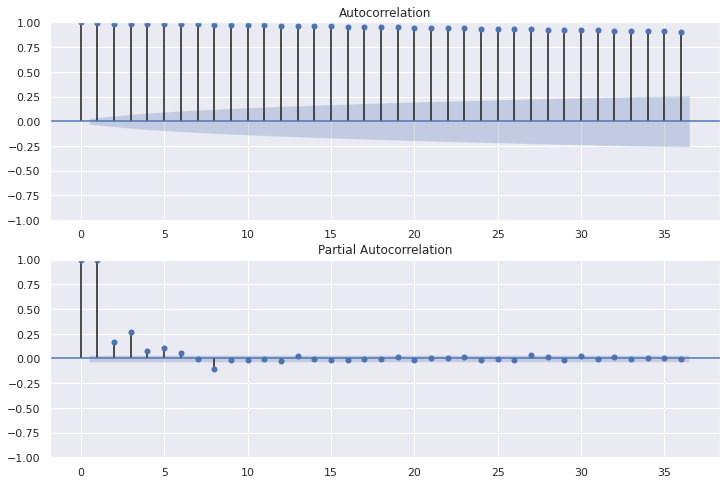

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1.Price, ax=ax1, ) # menggunakan nilai default lag
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1.Price, ax=ax2) # menggunakan nilai default Lag

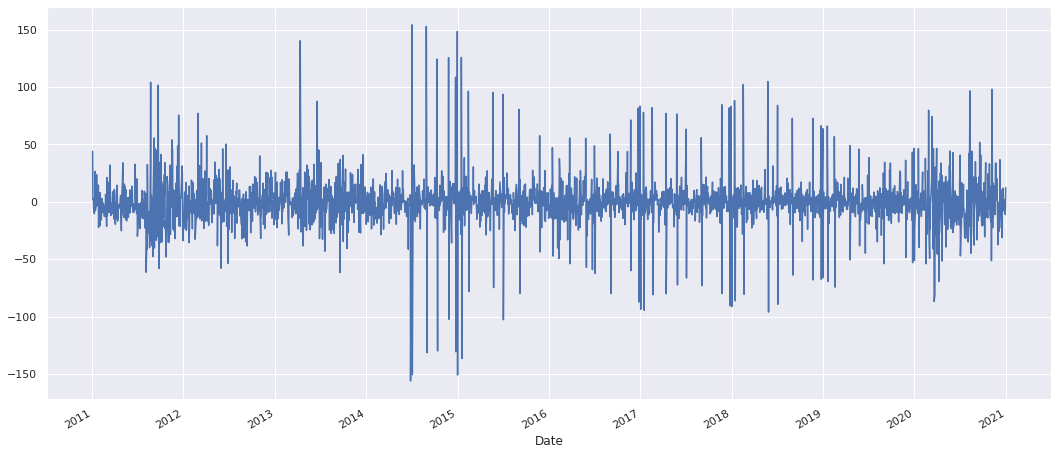

In [ ]:
first_diff = df.Price - df.Price.shift(1)
first_diff = first_diff.dropna(inplace = False)
first_diff.plot()

In [ ]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)

adf_test.should_diff(first_diff)

(0.01, False)

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

model = auto_arima(df1['Price'], trace=True, suppress_warnings=True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=32378.652, Time=6.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32912.006, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32787.298, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32621.645, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32910.137, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=32377.811, Time=3.54 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=32389.918, Time=2.57 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=32478.839, Time=1.77 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=32349.738, Time=8.03 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=32375.324, Time=3.67 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=32351.046, Time=9.57 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=32351.379, Time=5.02 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=32372.315, Time=3.68 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=32346.138, Time=9.50 sec
 ARIMA(3,1,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3652
Model:               SARIMAX(5, 1, 3)   Log Likelihood              -16149.705
Date:                Fri, 24 Dec 2021   AIC                          32317.411
Time:                        04:59:33   BIC                          32373.236
Sample:                             0   HQIC                         32337.291
                               - 3652                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1533      0.090     -1.703      0.088      -0.330       0.023
ar.L2          0.0516      0.064      0.809      0.419      -0.073       0.177
ar.L3         -0.5780      0.048    -12.077      0.000      -0.672      -0.484
ar.L4         -0.1559      0.028     -5.551      0.000      -0.211      -0.101
ar.L5         -0.1622      0.028     -5.882      0.000      -0.216      -0.108
ma.L1         -0.1373      0.089     -1.538      0.124      -0.312       0.038
ma.L2         -0.3816      0.053     -7.182      0.000      -0.486      -0.277
ma.L3          0.5994      0.051     11.732      0.000       0.499       0.700
sigma2       407.1112      4.024    101.179      0.000     399.225     414.997
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20997.82
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.82
Prob(H) (two-sided):                  0.05   Kurtosis:                        14.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df1, order=(5, 1, 3))
fitted = model.fit()
fitted.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 3652
Model:                 ARIMA(5, 1, 3)   Log Likelihood              -16149.705
Date:                Mon, 03 Jan 2022   AIC                          32317.411
Time:                        10:12:12   BIC                          32373.236
Sample:                    01-03-2011   HQIC                         32337.291
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1533      0.090     -1.703      0.088      -0.330       0.023
ar.L2          0.0516      0.064      0.809      0.419      -0.073       0.177
ar.L3         -0.5780      0.048    -12.077      0.000      -0.672      -0.484
ar.L4         -0.1559      0.028     -5.551      0.000      -0.211      -0.101
ar.L5         -0.1622      0.028     -5.882      0.000      -0.216      -0.108
ma.L1         -0.1373      0.089     -1.538      0.124      -0.312       0.038
ma.L2         -0.3816      0.053     -7.182      0.000      -0.486      -0.277
ma.L3          0.5994      0.051     11.732      0.000       0.499       0.700
sigma2       407.1112      4.024    101.179      0.000     399.225     414.997
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20997.82
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.82
Prob(H) (two-sided):                  0.05   Kurtosis:                        14.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

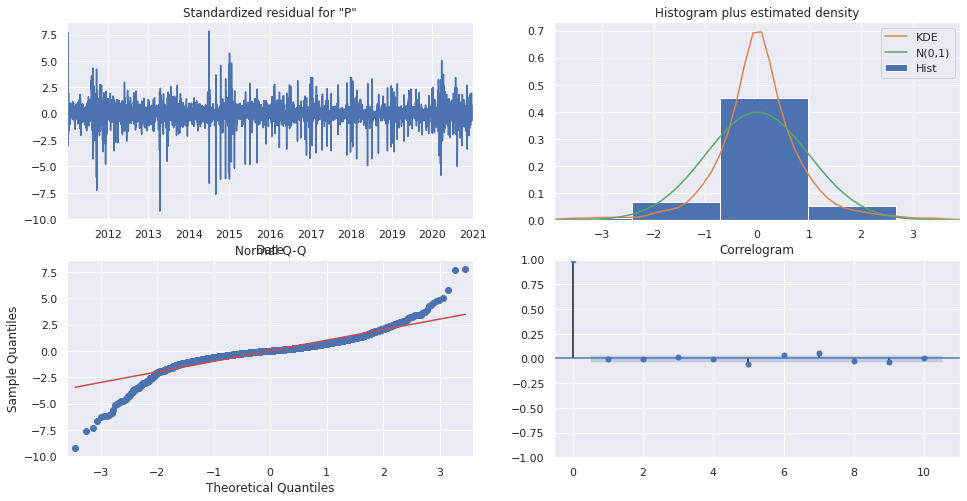

In [ ]:
fitted.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
pred = fitted.predict(start=pd.to_datetime('2011-01-03'), end=pd.to_datetime('2019-01-01'),typ='levels')
train_data['pred'] = pred

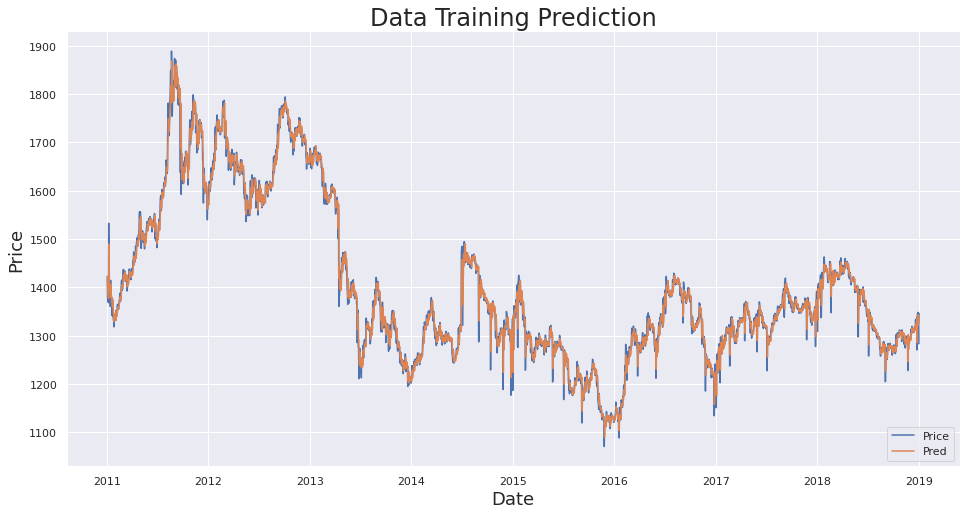

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Data Training Prediction', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.plot(train_data.Price)
plt.plot(train_data[1:].pred)
plt.legend(['Price', 'Pred'], loc='lower right')
plt.show()

In [ ]:
def MAPE(actual,pred):
    return round(np.mean(np.abs((actual - pred) / actual)) * 100, 2)
def RMSE(actual, pred):
    return round(np.sqrt(((actual - pred) ** 2).mean()), 2)

In [ ]:
print("MAPE Data Training ARIMA: ",MAPE(train_data.Price, train_data.pred), '%')
print("RMSE Data Training ARIMA: ", RMSE(train_data.Price, train_data.pred))

MAPE Data Training ARIMA:  0.92 %
RMSE Data Training ARIMA:  33.12


In [ ]:
pred2 = fitted.predict(start=pd.to_datetime('2019-01-02'), end=pd.to_datetime('2021-01-01'),typ='levels')
test_data['pred'] = pred2

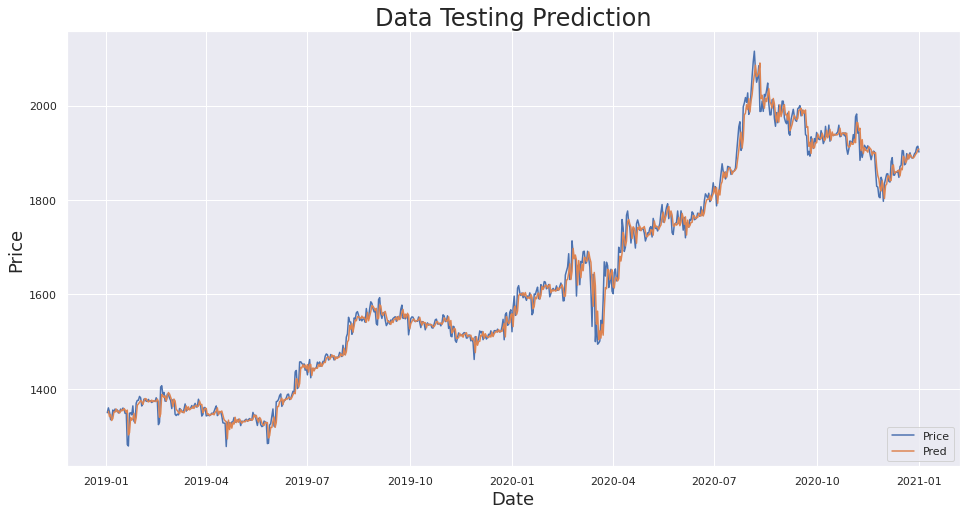

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Data Testing Prediction', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.plot(test_data.Price)
plt.plot(test_data[1:].pred)
plt.legend(['Price', 'Pred'], loc='lower right')
plt.show()

In [ ]:
print("MAPE Data Test ARIMA: ",MAPE(test_data.Price, test_data.pred), '%')
print("RMSE Data Test ARIMA: ", RMSE(test_data.Price, test_data.pred))

MAPE Data Test ARIMA:  0.82 %
RMSE Data Test ARIMA:  20.46


In [ ]:
# test_data.to_csv('test_data.csv')
# files.download('test_data.csv')

In [ ]:
# df2.to_csv('pred_arima.csv')
# files.download('pred_arima.csv')

In [ ]:
pred3 = fitted.predict(start=pd.to_datetime('2011-01-03'), end=pd.to_datetime('2021-01-01'),typ='levels')

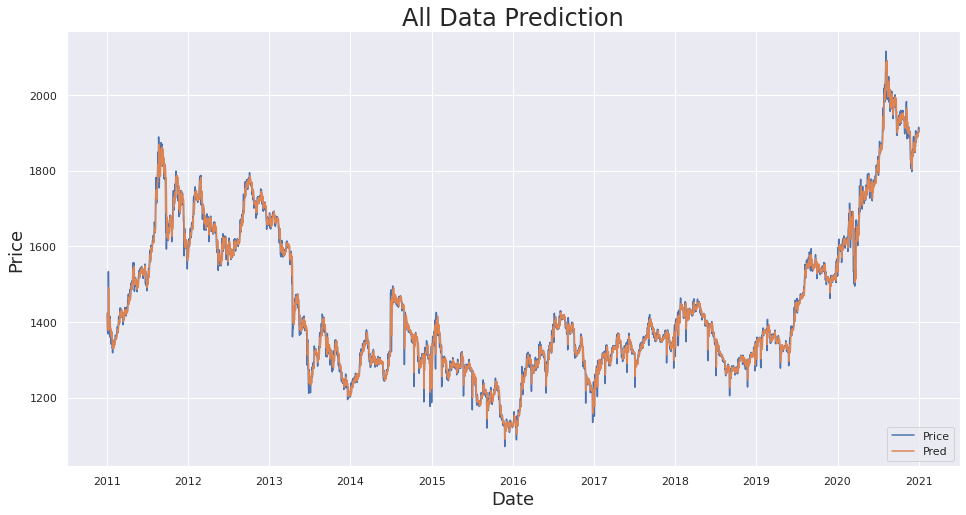

In [ ]:
plt.figure(figsize=(16,8))
plt.title('All Data Prediction', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.plot(df1.Price)
plt.plot(pred3[1:])
plt.legend(['Price', 'Pred'], loc='lower right')
plt.show()

In [ ]:
print("MAPE All Data ARIMA: ",MAPE(df1.Price, pred3), '%')
print("RMSE All Data ARIMA: ", RMSE(df1.Price, pred3))

MAPE All Data ARIMA:  0.9 %
RMSE All Data ARIMA:  31.0


In [ ]:
residuals = df1.Price[1:] - pred3[1:]
residuals = pd.DataFrame(residuals)
residuals.columns = ['Residuals']
residuals

,Residuals
Date,
2011-01-04,-43.974276
2011-01-05,-13.011440
2011-01-06,-16.095047
2011-01-07,-9.265024
2011-01-08,155.762280
...,...
2020-12-28,5.874993
2020-12-29,4.133115
2020-12-30,12.183557


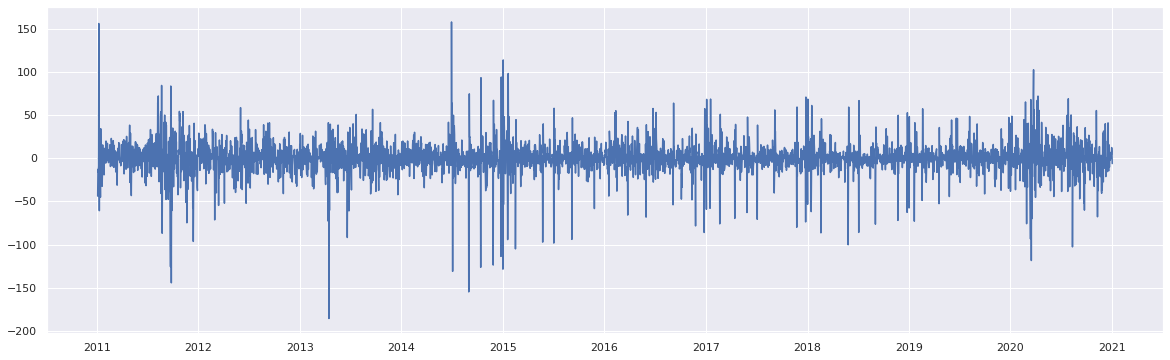

In [ ]:
plt.plot(residuals)

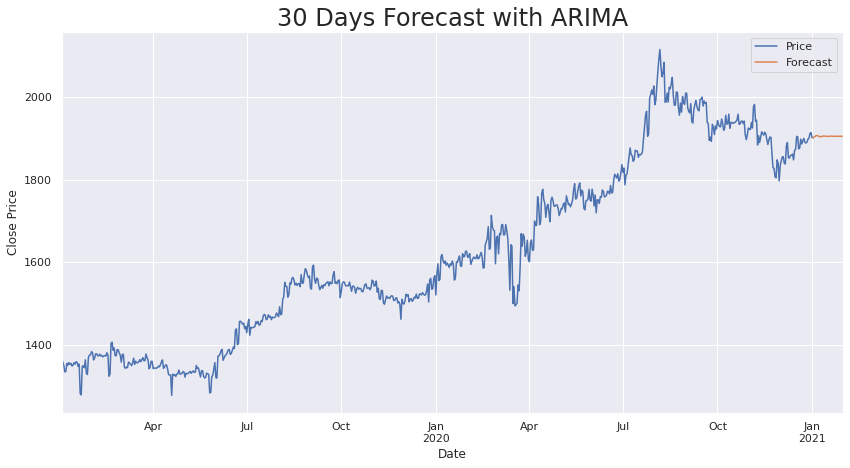

In [ ]:
pred_future = fitted.predict(start=pd.to_datetime('2021-01-02'), end=pd.to_datetime('2021-01-31'),typ='levels')

ax = test_data.Price.plot(label='Price', figsize=(14, 7))
pred_future.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')

plt.title('30 Days Forecast with ARIMA', fontsize=24)
plt.legend()
plt.show()

In [ ]:
df_forecast = pd.DataFrame(pred_uc)
df_forecast.columns = ['pred']
df_forecast

,pred
2021-01-02,1900.881716
2021-01-03,1903.926384
2021-01-04,1904.671829
2021-01-05,1906.706726
2021-01-06,1906.796832
2021-01-07,1906.098834
2021-01-08,1904.424123
2021-01-09,1904.154446
2021-01-10,1904.168701
2021-01-11,1905.214857


# ANN

In [ ]:
import math

dataset = residuals.values

training_data_len = math.ceil( len(dataset) * 0.8)
training_data_len

2921

In [ ]:
train_data1 = scaled_data[0:training_data_len, :]
test_data1 = scaled_data[training_data_len - 10: , :]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit_transform(residuals)
scaled_data = scaler.transform(residuals)

In [ ]:
x_train = []
y_train = []

for i in range(10, len(train_data1)):
    x_train.append(train_data1[i-10:i, 0])
    y_train.append(train_data1[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [ ]:
print(train_data1.shape)
print(x_train.shape, y_train.shape)

(2921, 1)
(2911, 10, 1) (2911,)


In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2911, 10, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(125, return_sequences=False, input_shape= (x_train.shape[1], 1)))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

model_lstm.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2911/2911 [==============================] - 27s 8ms/step - loss: 0.0049
Epoch 2/5
2911/2911 [==============================] - 16s 6ms/step - loss: 0.0038
Epoch 3/5
2911/2911 [==============================] - 16s 6ms/step - loss: 0.0037
Epoch 4/5
2911/2911 [==============================] - 16s 5ms/step - loss: 0.0036
Epoch 5/5
2911/2911 [==============================] - 16s 6ms/step - loss: 0.0036


In [ ]:
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data1)):
  x_test.append(test_data1[i-10:i, 0])

In [ ]:
#convert the data to numpy array
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(730, 10, 1)

In [ ]:
# Get the models predicted price values
train_pred = model_lstm.predict(x_train)
train_pred = scaler.inverse_transform(train_pred)

In [ ]:
train = residuals[:training_data_len-10]
train['Predictions'] = train_pred
train

,Residuals,Predictions
Date,,
2011-01-04,-43.974276,1.168916
2011-01-05,-13.011440,1.160530
2011-01-06,-16.095047,-0.008516
2011-01-07,-9.265024,1.635511
2011-01-08,155.762280,1.085320
...,...,...
2018-12-19,6.172800,2.032583
2018-12-20,13.498250,2.904433
2018-12-21,-3.210063,1.972613


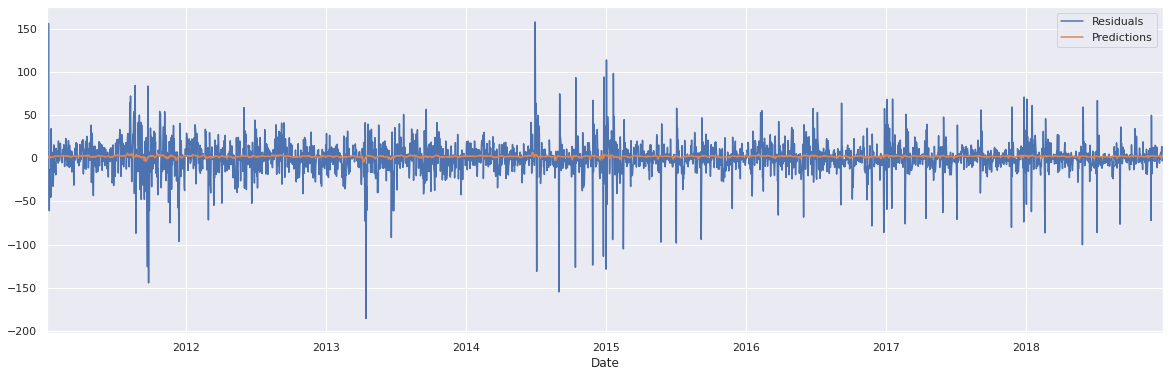

In [ ]:
train.plot()

In [ ]:
train_pred_hybrid = train_data[1:-10].pred + train.Predictions
train_pred_hybrid

Date
2011-01-04    1423.643192
2011-01-05    1387.571970
2011-01-06    1387.486531
2011-01-07    1379.400535
2011-01-08    1378.180183
                 ...     
2018-12-19    1317.159783
2018-12-20    1322.506183
2018-12-21    1328.282676
2018-12-22    1323.927677
2018-12-23            NaN
Freq: D, Length: 2911, dtype: float64

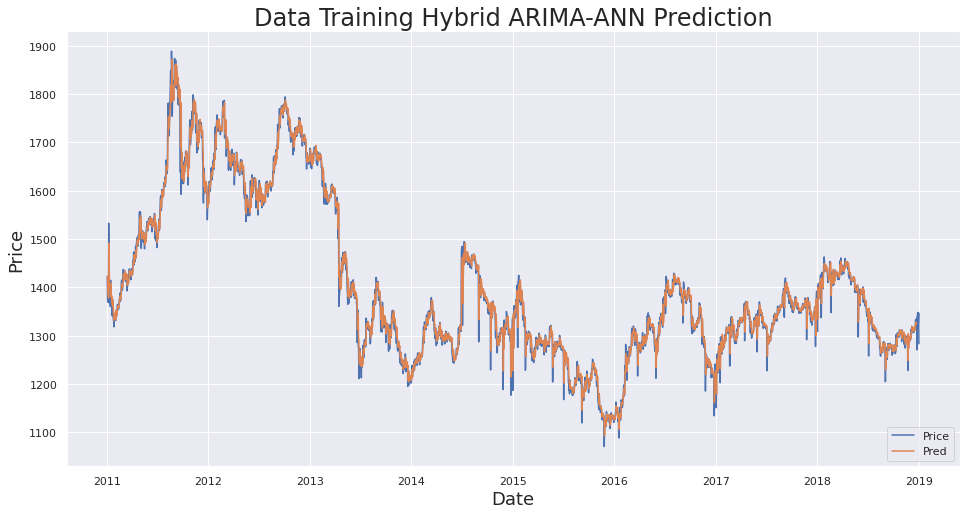

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Data Training Hybrid ARIMA-ANN Prediction', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.plot(train_data.Price)
plt.plot(train_pred_hybrid)
plt.legend(['Price', 'Pred'], loc='lower right')
plt.show()

In [ ]:
print("MAPE Data Training Hybrid ARIMA-ANN: ",MAPE(train_data.Price, train_pred_hybrid), '%')
print("RMSE Data Training Hybrid ARIMA-ANN: ", RMSE(train_data.Price, train_pred_hybrid))

MAPE Data Training Hybrid ARIMA-ANN:  0.89 %
RMSE Data Training Hybrid ARIMA-ANN:  20.06


In [ ]:
# Get the models predicted price values
test_pred = model_lstm.predict(x_test)
test_pred = scaler.inverse_transform(test_pred)

In [ ]:
train = residuals[:training_data_len]
valid = residuals[training_data_len:]
valid['Predictions'] = test_pred
valid

,Residuals,Predictions
Date,,
2019-01-03,7.261020,0.753926
2019-01-04,9.688464,2.693901
2019-01-05,-11.093905,2.309244
2019-01-06,2.989571,2.609957
2019-01-07,17.810611,2.047310
...,...,...
2020-12-28,5.874993,2.012784
2020-12-29,4.133115,2.010596
2020-12-30,12.183557,2.186234


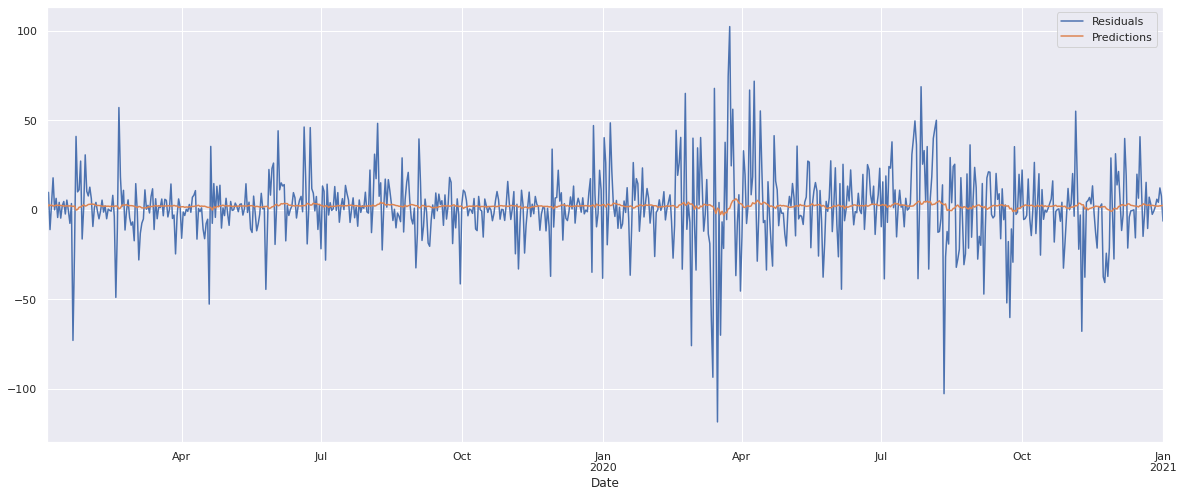

In [ ]:
valid.plot(figsize=(20,8))

In [ ]:
# valid.to_csv('valid.csv')
# files.download('valid.csv')

In [ ]:
test_data['pred_hybrid'] = test_data.pred + valid.Predictions
test_data

,Price,pred_hybrid,pred
Date,,,
2019-01-02,1349.500000,NaN,1301.658915
2019-01-03,1359.800000,1353.292905,1352.538980
2019-01-04,1351.000000,1344.005437,1341.311536
2019-01-05,1334.768286,1348.171435,1345.862191
2019-01-06,1336.041096,1335.661483,1333.051525
...,...,...,...
2020-12-28,1898.000000,1894.137791,1892.125007
2020-12-29,1900.800000,1898.677480,1896.666885
2020-12-30,1911.800000,1901.802676,1899.616443


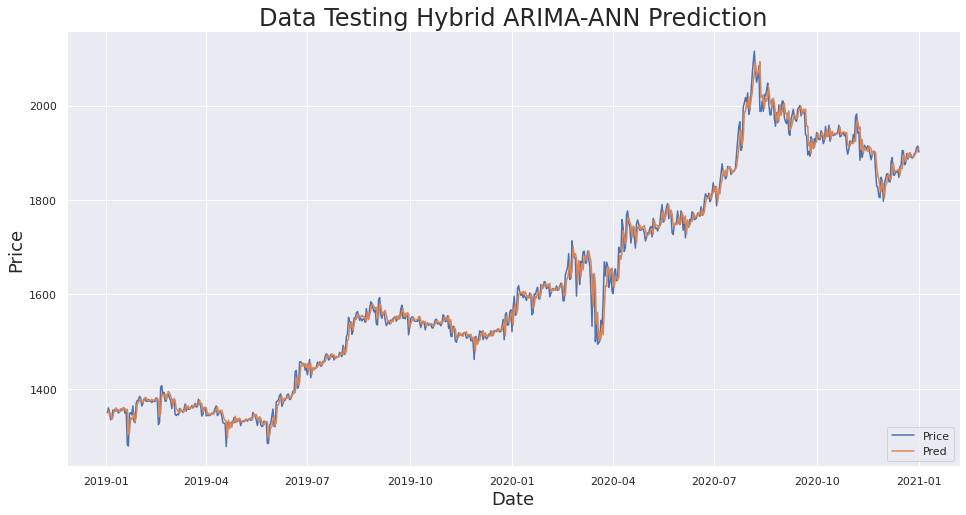

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Data Testing Hybrid ARIMA-ANN Prediction', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.plot(test_data.Price)
plt.plot(test_data.pred_hybrid)
plt.legend(['Price', 'Pred'], loc='lower right')
plt.show()

In [ ]:
print("MAPE Data Testing Hybrid ARIMA-ANN: ",MAPE(test_data.Price, test_data.pred_hybrid), '%')
print("RMSE Data Testing Hybrid ARIMA-ANN: ", RMSE(test_data.Price, test_data.pred_hybrid))

MAPE Data Testing Hybrid ARIMA-ANN:  0.81 %
RMSE Data Testing Hybrid ARIMA-ANN:  20.38


In [ ]:
# test_data.to_csv('test_data_afterhybrid.csv')
# files.download('test_data_afterhybrid.csv')

In [ ]:
predictions = []
first_eval_batch = valid.Predictions.values[-10: ]
crntbatch = first_eval_batch.reshape((1, 10, 1))
for i in range(30):
  crntpred = model_lstm.predict(crntbatch)[0]
  predictions.append(crntpred)
  crntbatch = np.append(crntbatch[: ,1:,:], [[crntpred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(predictions)

In [ ]:
df_forecast['residu_hybrid'] = true_predictions
df_forecast['pred_hybrid'] = df_forecast.pred + df_forecast.residu_hybrid
df_forecast

,pred,residu_hybrid,pred_hybrid
2021-01-02,1900.881716,29.706177,1930.587893
2021-01-03,1903.926384,32.394132,1936.320517
2021-01-04,1904.671829,21.993076,1926.664906
2021-01-05,1906.706726,19.299087,1926.005813
2021-01-06,1906.796832,14.827119,1921.623951
2021-01-07,1906.098834,12.145198,1918.244032
2021-01-08,1904.424123,9.607334,1914.031457
2021-01-09,1904.154446,7.735675,1911.890121
2021-01-10,1904.168701,6.077351,1910.246052
2021-01-11,1905.214857,4.767767,1909.982623


In [ ]:
# df_forecast.to_csv('df_forecast.csv')
# files.download('df_forecast.csv')

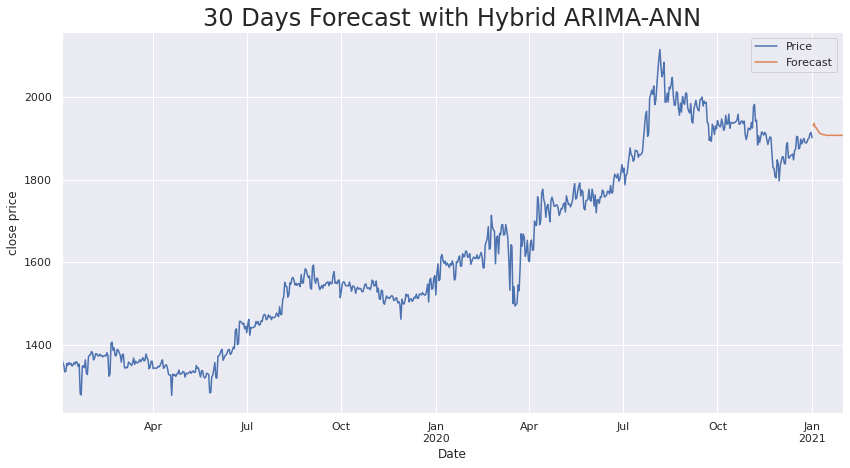

In [ ]:
ax = test_data.Price.plot(label='Price', figsize=(14, 7))
df_forecast.pred_hybrid.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('close price')

plt.title('30 Days Forecast with Hybrid ARIMA-ANN', fontsize=24)
plt.legend()
plt.show()

In [ ]:
print("MAPE Data Training ARIMA: ",MAPE(train_data.Price, train_data.pred), '%')
print("RMSE Data Training ARIMA: ", RMSE(train_data.Price, train_data.pred))

print("MAPE Data Test ARIMA: ",MAPE(test_data.Price, test_data.pred), '%')
print("RMSE Data Test ARIMA: ", RMSE(test_data.Price, test_data.pred))

print("MAPE Data Training Hybrid ARIMA-ANN: ",MAPE(train_data.Price, train_pred_hybrid), '%')
print("RMSE Data Training Hybrid ARIMA-ANN: ", RMSE(train_data.Price, train_pred_hybrid))

print("MAPE Data Testing Hybrid ARIMA-ANN: ",MAPE(test_data.Price, test_data.pred_hybrid), '%')
print("RMSE Data Testing Hybrid ARIMA-ANN: ", RMSE(test_data.Price, test_data.pred_hybrid))

MAPE Data Training ARIMA:  0.92 %
RMSE Data Training ARIMA:  33.12
MAPE Data Test ARIMA:  0.82 %
RMSE Data Test ARIMA:  20.46
MAPE Data Training Hybrid ARIMA-ANN:  0.89 %
RMSE Data Training Hybrid ARIMA-ANN:  20.06
MAPE Data Testing Hybrid ARIMA-ANN:  0.81 %
RMSE Data Testing Hybrid ARIMA-ANN:  20.38
